In [70]:
import numpy as np
from matplotlib import pyplot as plt
from math import floor, ceil # for rounding up and down
from scipy.stats import pearsonr
from sklearn import datasets
import pandas as pd
import math
from typing import Dict, Tuple, List
import copy

In [71]:
def Get_Class_Label_Of_Object(x):
    return x[len(x)-1]

def Distance(x, y):
    if len(x) != len(y):
        return -1
    
    sum = 0
    for i in range(len(x)):
        sum += (x[i]-y[i])*(x[i]-y[i])
        
    return sum

[[  1.00000000e+00   1.42300000e+01   1.71000000e+00 ...,   1.04000000e+00
    3.92000000e+00   1.06500000e+03]
 [  1.00000000e+00   1.32000000e+01   1.78000000e+00 ...,   1.05000000e+00
    3.40000000e+00   1.05000000e+03]
 [  1.00000000e+00   1.31600000e+01   2.36000000e+00 ...,   1.03000000e+00
    3.17000000e+00   1.18500000e+03]
 ..., 
 [  3.00000000e+00   1.32700000e+01   4.28000000e+00 ...,   5.90000000e-01
    1.56000000e+00   8.35000000e+02]
 [  3.00000000e+00   1.31700000e+01   2.59000000e+00 ...,   6.00000000e-01
    1.62000000e+00   8.40000000e+02]
 [  3.00000000e+00   1.41300000e+01   4.10000000e+00 ...,   6.10000000e-01
    1.60000000e+00   5.60000000e+02]]


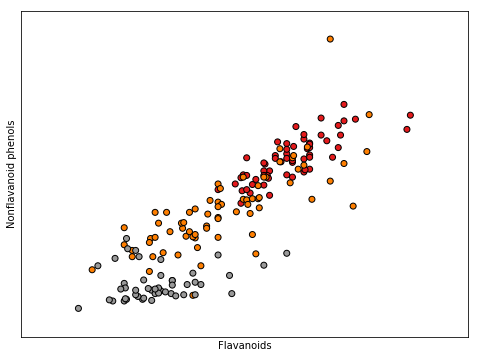

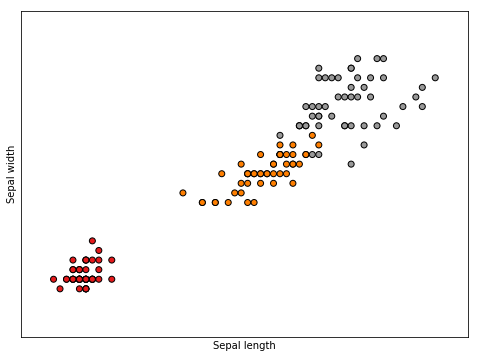

In [72]:
def PrepareData():
    all_data = np.loadtxt(open("./wine_data.csv","r"), delimiter = ",", skiprows = 0, dtype = np.float64)

    print (all_data)
    
    # load class labels from column 1
    y_wine = all_data[:,0]
    #print (y_wine)
    # conversion of the class labels to integer-type array
    y_wine = y_wine.astype(np.int64, copy = False)

    # load the 14 features
    X_wine = all_data[:,1:]
    
    data = all_data[:, 6:8]   #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 6:9    
    
    from scipy.stats import pearsonr

    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5

    plt.figure(2, figsize = (8, 6))
    plt.clf()

    # Plot the training points
    plt.scatter(data[:, 0], data[:, 1], c = y_wine, cmap = plt.cm.Set1, edgecolor = 'k')
    plt.xlabel('Flavanoids')
    plt.ylabel('Nonflavanoid phenols')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

    plt.show()
    
    
    

    uniq = [1 for x in range(len(data))]
    
    cnt_of_uniq = 0
    for i in range(len(data)):
        for j in range(i+1,len(data)):
            if data[i, 0] == data[j, 0] and data[i, 1] == data[j, 1]:
                uniq[j] = 0
   
    for i in range(len(data)):
        if uniq[i] == 1:
            cnt_of_uniq += 1
            
    w, h = 3, cnt_of_uniq
    m = [[0 for x in range(w)] for y in range(h)] 
          
    cur_cnt = 0
    for i in range(len(data)):
        if uniq[i] == 1:
            for j in range(2):
                m[cur_cnt][j] = data[i, j]
            m[cur_cnt][2] = y_wine[i]-1
            cur_cnt += 1
    
    data = m
    return data

data = PrepareData()



def Prepare_Iris_Data():
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn import datasets
    from sklearn.decomposition import PCA

    # import some data to play with
    iris = datasets.load_iris()
    X = iris.data[:, 2:4]  # we only take the first two features.
    y = iris.target

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    plt.figure(2, figsize = (8, 6))
    plt.clf()

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
                edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

    plt.show()
    
    uniq = [1 for x in range(len(X))]
    
    cnt_of_uniq = 0
    for i in range(len(X)):
        for j in range(i+1,len(X)):
            if X[i, 0] == X[j, 0] and X[i, 1] == X[j, 1]:
                uniq[j] = 0
   
    for i in range(len(X)):
        if uniq[i] == 1:
            cnt_of_uniq += 1
            
    w, h = 3, cnt_of_uniq
    m = [[0 for x in range(w)] for y in range(h)] 
          
    cur_cnt = 0
    for i in range(150):
        if uniq[i] == 1:
            for j in range(2):
                m[cur_cnt][j] = X[i, j]
            m[cur_cnt][2] = y[i]
            cur_cnt += 1
    
    data = m
    return data
    
iris_data = Prepare_Iris_Data()

In [73]:
class FRiS_STOLP:
    EPS = 1E-7
    
    def Get_Nearest_Neighbour(self, x, Omega):
        dist = [0]*len(Omega)

        for i in range(len(Omega)):
            dist[i] = Distance(x[0:len(x)-1], Omega[i][0:len(x)-1])

        min_dist = min(dist)

        for i in range(len(Omega)):
            if dist[i] + self.EPS > min_dist and dist[i] - self.EPS < min_dist:
                return Omega[i]

    def FindEtalon(self, X, Omega, Xl, defence_to_tolerance_ratio):
        label = Get_Class_Label_Of_Object(X[0])
        Efficiency = [0]*len(X)
        
        Tolerance_denom = 0
        for item in Xl: 
            if Get_Class_Label_Of_Object(item) != label:
                Tolerance_denom += 1
                
        if Tolerance_denom == 0:
            Tolerance_denom = 1
                
        cnt_of_0_class_elements = 0
        cnt_of_1_class_elements = 0
        cnt_of_2_class_elements = 0
        
        for item in Xl: 
            cur_label_111 = Get_Class_Label_Of_Object(item)
            if cur_label_111 == 0:
                cnt_of_0_class_elements += 1
            if cur_label_111 == 1:
                cnt_of_1_class_elements += 1
            if cur_label_111 == 2:
                cnt_of_2_class_elements += 1
                
    #    print (20 * "-")
    #    print (cnt_of_0_class_elements)
    #    print (cnt_of_1_class_elements)
    #    print (cnt_of_2_class_elements)
    #    print (20 * "-")
                
        for i in range(len(X)):
            x = X[i]
            
            sum_of_defence = 0
            
            for item in X: 
                if item != x and Get_Class_Label_Of_Object(item) == label:
                    NN_enemy_etalon = self.Get_Nearest_Neighbour(item, Omega)
                    S = self.FRiS(NN_enemy_etalon, item, x)
                    sum_of_defence += S

            Defence = sum_of_defence / (len(X)-1)

            Tolerance_sum = 0
          
            for item in Xl: 
                if Get_Class_Label_Of_Object(item) != label:
                    NN_enemy_etalon = self.Get_Nearest_Neighbour(item, Omega)
                    S = self.FRiS(x, item, NN_enemy_etalon)
                    Tolerance_sum += S

            Tolerance = Tolerance_sum / Tolerance_denom

            Efficiency[i] = defence_to_tolerance_ratio * Defence + (1.0 - defence_to_tolerance_ratio) * Tolerance

        max_Efficiency = max(Efficiency)

        for i in range(len(X)):
            if Efficiency[i] + self.EPS > max_Efficiency and Efficiency[i] - self.EPS < max_Efficiency:
                return X[i]


    def Get_Objects_From_Ith_Class(self, X, class_label):
        cnt = 0

        for i in range(len(X)):
            obj = X[i]

            if Get_Class_Label_Of_Object(obj) == class_label:
                cnt += 1

        w, h = 4, cnt
        res = [[0 for x in range(w)] for y in range(h)] 

        cnt = 0

        for i in range(len(X)):
            obj = X[i]
            if Get_Class_Label_Of_Object(obj) == class_label:
                res[cnt] = obj
                cnt += 1

        return res

    # --------------------------------------------------------------

    def Get_Enemies_Of_Ith_Class(self, X, class_label):
        cnt = 0

        for i in range(len(X)):
            obj = X[i]
            if Get_Class_Label_Of_Object(obj) != class_label:
                cnt += 1

        w, h = 4, cnt
        res = [[0 for x in range(w)] for y in range(h)] 

        cnt = 0

        for i in range(len(X)):
            obj = X[i]
            if Get_Class_Label_Of_Object(obj) != class_label:
                res[cnt] = obj
                cnt += 1

        return res

    # --------------------------------------------------------------

    def Truncate_Set(self, X, Y):
        res = []
        for i in range(len(X)):
            is_exist = False

            for j in range(len(Y)):
                if X[i] == Y[j]:
                    is_exist = True
                    break

            if is_exist == False:
                res[len(res):]  = [X[i]]

        return res

    # --------------------------------------------------------------

    
    def FRiS(self, a, x, c):
        S_nom = math.sqrt(Distance(a[0:len(x)-1], x[0:len(x)-1])) - math.sqrt(Distance(x[0:len(x)-1], c[0:len(x)-1]))
        S_denom = math.sqrt(Distance(a[0:len(x)-1], x[0:len(x)-1])) + math.sqrt(Distance(x[0:len(x)-1], c[0:len(x)-1]))
        S = S_nom / S_denom
        return S    
    
    def Construct_A_Set_Of_Correctly_Classified_Objects(self, Xl, Etalons):
        res = []
        
        for i in range(len(Xl)):
            x = Xl[i]
            label_of_cur_class = Get_Class_Label_Of_Object(x)

            Enemies_Etalons = copy.deepcopy(Etalons)
            del Enemies_Etalons[label_of_cur_class]
            Enemies_Etalons = self.Merge_Elements(Enemies_Etalons)
            
            nearest_neighbour_friend = self.Get_Nearest_Neighbour(x, Etalons[label_of_cur_class])
            nearest_neighbour_enemy = self.Get_Nearest_Neighbour(x, Enemies_Etalons)
            
            S = self.FRiS(nearest_neighbour_enemy, x, nearest_neighbour_friend)
            
            if S > 0:
                res[len(res):] = [x]
                
        return res
    # --------------------------------------------------------------  

    def Get_Number_Of_Classes_In_Dataset(self, Xl):
        len_of_obj = len(Xl[0])
        
        labels = set()
        for obj in Xl:
            cur_label = obj[len_of_obj-1]
            labels.add(cur_label)
    
        return len(labels)
        
    def Merge_Elements(self, lst):
        res = []
        for i in range(len(lst)):
            res += lst[i]
            
        return res
        
        
    def Get_Etalons(self, Xl):
        number_of_classes = self.Get_Number_Of_Classes_In_Dataset(Xl)
        
        Etalons = [list() for i in range(number_of_classes)]

        for i in range(3):    
            Xy = self.Get_Objects_From_Ith_Class(Xl, i)
            X_enemies = self.Get_Enemies_Of_Ith_Class(Xl, i)
            
            Etalons[i][len(Etalons[i]):] = [self.FindEtalon(Xy, X_enemies, Xl, 0.5)]
            print (Etalons)
            
        for i in range(3):
            Xy = self.Get_Objects_From_Ith_Class(Xl, i)

            Enemies_Etalons = copy.deepcopy(Etalons)
          
            del Enemies_Etalons[i]
            Enemies_Etalons = self.Merge_Elements(Enemies_Etalons)
            
            Etalons[i] = []
            Etalons[i][len(Etalons[i]):] = [self.FindEtalon(Xy, Enemies_Etalons, Xl, 0.5)]
            
     
        while len(Xl) > 0:
            U = self.Construct_A_Set_Of_Correctly_Classified_Objects(Xl, Etalons)
         
            Xl = self.Truncate_Set(Xl, U)

            for i in range(3):
                Xy = self.Get_Objects_From_Ith_Class(Xl, i)

                if len(Xy) == 0: 
                    continue

                Enemies_Etalons = copy.deepcopy(Etalons)
                del Enemies_Etalons[i]
                Enemies_Etalons = self.Merge_Elements(Enemies_Etalons)
                
                if len(Xy) == 1:
                    obj = Xy[0]
                    Etalons[i][len(Etalons[i]):] = [obj]
                else:
                    Etalons[i][len(Etalons[i]):] = [self.FindEtalon(Xy, Enemies_Etalons, Xl, 0.5)]

        return Etalons

[[[3.0, 3.1699999999999999, 0]], [], []]
[[[3.0, 3.1699999999999999, 0]], [[1.95, 1.6899999999999999, 1]], []]
[[[3.0, 3.1699999999999999, 0]], [[1.95, 1.6899999999999999, 1]], [[1.6200000000000001, 0.66000000000000003, 2]]]


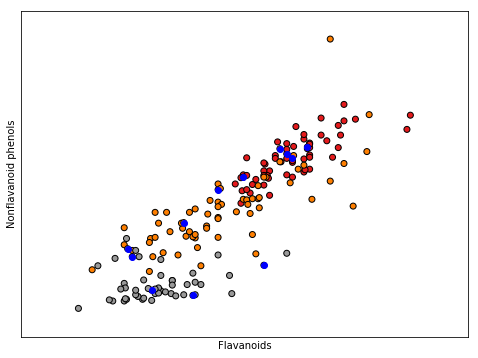

In [74]:
fris = FRiS_STOLP()
Etalons = fris.Get_Etalons(data)

all_data = np.loadtxt(open("./wine_data.csv","r"), delimiter = ",", skiprows = 0, dtype = np.float64)


# load class labels from column 1
y_wine = all_data[:,0]
#print (y_wine)
# conversion of the class labels to integer-type array
y_wine = y_wine.astype(np.int64, copy = False)

# load the 14 features
X_wine = all_data[:,1:]

data = all_data[:, 6:8]   #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 6:9    

from scipy.stats import pearsonr

x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5

plt.figure(2, figsize = (8, 6))
plt.clf()

# Plot the training points
plt.scatter(data[:, 0], data[:, 1], c = y_wine, cmap = plt.cm.Set1, edgecolor = 'k')
plt.xlabel('Flavanoids')
plt.ylabel('Nonflavanoid phenols')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

x_coord = []
y_coord = []
labels = []

Etalons = fris.Merge_Elements(Etalons)

for i in range(len(Etalons)):
    x_coord.append(Etalons[i][0])
    
for i in range(len(Etalons)):
    y_coord.append(Etalons[i][1])

#plt.plot(iris_data[119][0], iris_data[119][1], 'ro', color = 'g')
plt.plot(x_coord, y_coord, 'ro', color = 'b')

plt.show()

[[[1.5, 0.29999999999999999, 0]], [], []]
[[[1.5, 0.29999999999999999, 0]], [[4.4000000000000004, 1.3, 1]], []]
[[[1.5, 0.29999999999999999, 0]], [[4.4000000000000004, 1.3, 1]], [[5.5, 2.1000000000000001, 2]]]


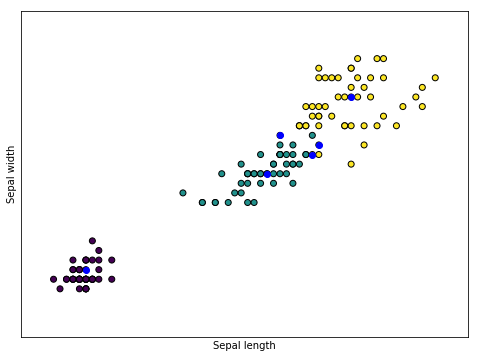

In [75]:
fris_for_iris = FRiS_STOLP()
Etalons_iris = fris_for_iris.Get_Etalons(iris_data)

import matplotlib.pyplot as plt
import matplotlib.colors as matplotcolor
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize = (8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolor = 'k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

x_coord = []
y_coord = []
labels = []

Etalons_iris = fris_for_iris.Merge_Elements(Etalons_iris)

for i in range(len(Etalons_iris)):
    x_coord.append(Etalons_iris[i][0])
    
for i in range(len(Etalons_iris)):
    y_coord.append(Etalons_iris[i][1])

#plt.plot(iris_data[119][0], iris_data[119][1], 'ro', color = 'g')
plt.plot(x_coord, y_coord, 'ro', color = 'b')

plt.show()

In [ ]:
def Classify(x, Etalons):
    return Get_Class_Label_Of_Object(Get_Nearest_Neighbour(x, Etalons))